### 1. Bibliotecas

In [1]:
# Bibliotecas básicas
import os
import warnings
from itertools import product
import itertools

import numpy as np
import pandas as pd

#  Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem e aprendizado de máquina
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
import shap

# Pré-processamento e métricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)

c:\Users\Usuaro\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Exibir todas as linhas e as colunas
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

# Evitar a exibição de avisos
warnings.filterwarnings('ignore')

# Definir diretório, caso queira importação off-line
os.chdir('G:/Meu Drive/MeuDrive2/tese_joao/dados')

### 2. Importando e analisando os dados

In [3]:
# Importar online via GitHub. Pode dar erro caso exista muitas requisições.
#url_poa = 'https://github.com/JoaoSilvaFelix/tese_joao/raw/main/dados/df_conjunto_poa.xlsx'
#df = pd.read_excel(url_poa)

# Importação off-line
df = pd.read_excel('df_conjunto_poa.xlsx')

In [4]:
# Primeiras obsevações
df.head()

,semana,cesta_dieese,carne,leite,feijao,arroz,farinha,batata,tomate,pao,cafe,banana,acucar,oleo,manteiga,cesta_online
0,2024-02-17,796.81,42.606825,4.827536,10.246674,8.034035,4.460417,7.684963,10.661256,12.453333,10.347826,6.487500,5.461429,7.531000,13.610380,783.868789
1,2024-02-24,796.81,43.001242,4.955743,10.366534,7.860880,4.430379,7.841235,8.902240,12.999417,10.690439,6.261021,5.525000,7.265500,13.223074,772.538520
2,2024-03-02,777.43,42.895945,4.998554,10.643001,7.797708,4.395312,7.027170,7.561832,13.261071,10.687602,6.341736,5.530952,7.124349,13.098829,758.100516
3,2024-03-09,777.43,43.992396,4.923698,10.348626,7.646386,4.266668,6.351473,7.738502,12.740067,10.775849,6.586459,5.576333,6.845561,13.405810,761.187327
4,2024-03-16,777.43,43.536435,5.069316,10.614613,7.712125,4.211390,5.930764,8.871192,15.187000,10.824677,6.550048,5.955357,6.606989,13.335841,783.276598


In [5]:
# Algumas estatísticas descritivas
df.describe().T

,count,mean,min,25%,50%,75%,max,std
semana,68,2024-10-08 12:00:00,2024-02-17 00:00:00,2024-06-13 06:00:00,2024-10-08 12:00:00,2025-02-02 18:00:00,2025-05-31 00:00:00,NaN
cesta_dieese,68.0,783.963676,740.82,770.4625,779.07,801.45,834.22,23.150114
carne,68.0,45.670623,39.075238,40.284296,43.699352,50.988049,53.29,5.219523
leite,68.0,5.165177,4.59,4.732857,5.159716,5.606584,5.834737,0.438636
feijao,68.0,9.488318,7.045281,9.154834,9.493773,10.11734,10.827219,0.861424
arroz,68.0,7.48086,6.39,7.092865,7.639856,7.799825,8.206362,0.46629
farinha,68.0,4.324319,3.525714,4.042321,4.279496,4.617875,5.112913,0.431386
batata,68.0,5.003907,2.808881,4.089475,4.722143,5.994328,8.179333,1.318466
tomate,68.0,7.35125,3.507143,5.537321,7.61,8.770113,10.661256,1.903145
pao,68.0,13.856031,10.99,12.485,13.270952,15.411429,17.095405,1.696313


Comparação, para a cidade de Porto Alegre, entre os dados coletados online e os dados divulgados pelo DIEESE

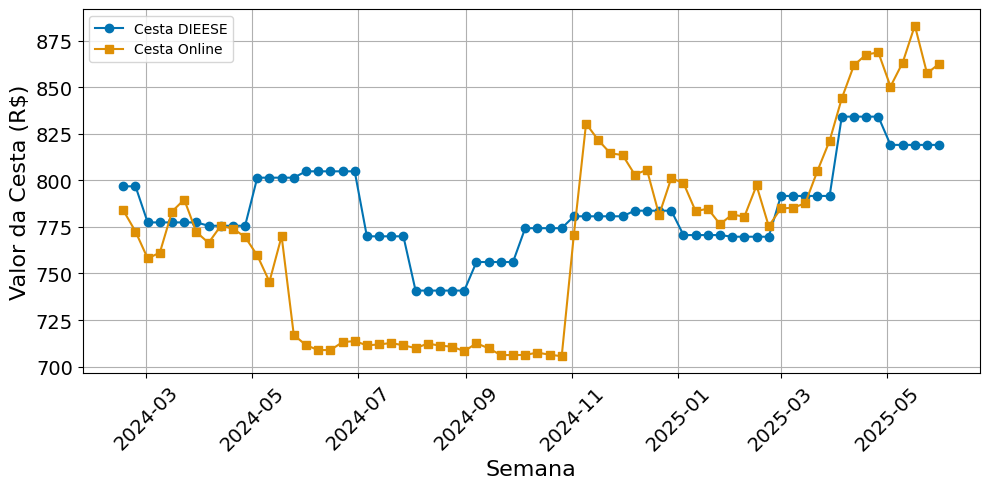

In [6]:
# Paleta daltônica
colors = sns.color_palette("colorblind")

# Criar figura
plt.figure(figsize=(10, 5))
plt.plot(df['semana'], df['cesta_dieese'], label='Cesta DIEESE', marker='o', color=colors[0])
plt.plot(df['semana'], df['cesta_online'], label='Cesta Online', marker='s', color=colors[1])


# Ajustes visuais
plt.xlabel('Semana', fontsize=16)   # legenda eixo x
plt.ylabel('Valor da Cesta (R$)', fontsize=16)  # legenda eixo y
plt.title('')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, fontsize=14)  # aumenta os números do eixo x
plt.yticks(fontsize=14)               # aumenta os números do eixo y
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 3. Previsões

In [7]:
# Dados
X = df.drop(columns=['semana', 'cesta_dieese', 'cesta_online'])
y = df['cesta_dieese']

#### 3.1 Ridge

In [8]:
# Parâmetros para busca
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Armazenar resultados
resultados_parametros = {}

for alpha in param_grid['alpha']:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):  # Começa de i=10 para evitar modelos instáveis
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo Ridge
        model_ridge = Ridge(alpha=alpha)
        model_ridge.fit(X_train_scaled, y_train)
        y_pred = model_ridge.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # em %

    resultados_parametros[alpha] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Identificar melhor alpha com base no RMSE (poderia usar mae ou mape se quiser)
melhor_alpha = min(resultados_parametros, key=lambda a: resultados_parametros[a]['rmse'])

# Exibir resultados
print("Melhor alpha:", melhor_alpha)
print("Melhor RMSE:", resultados_parametros[melhor_alpha]['rmse'])
print("Melhor MAE:", resultados_parametros[melhor_alpha]['mae'])
print("Melhor MAPE: {:.2f}%".format(resultados_parametros[melhor_alpha]['mape']))

Melhor alpha: 1.0
Melhor RMSE: 18.788414171773912
Melhor MAE: 13.433088704944211
Melhor MAPE: 1.71%


In [9]:
# df para criação do plote de comparação dos resultados
df_resultado_ridge = pd.DataFrame({
    'semana': df['semana'].iloc[10:].values,
    'real': resultados_parametros[melhor_alpha]['y_real'],
    'ridge': resultados_parametros[melhor_alpha]['y_pred']
})


#### 3.2 KNN

In [10]:
# Grade expandida de hiperparâmetros
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Gerar combinações de hiperparâmetros
combinacoes = list(itertools.product(
    param_grid['n_neighbors'],
    param_grid['weights'],
    param_grid['p']
))

# Armazenar resultados
resultados_parametros = {}

for n_neighbors, weights, p in combinacoes:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base apenas no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo KNN com múltiplos hiperparâmetros
        model_knn = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p
        )
        model_knn.fit(X_train_scaled, y_train)
        y_pred = model_knn.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_neighbors, weights, p)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Escolher o melhor conjunto de hiperparâmetros com base no RMSE
melhor_param = min(resultados_parametros, key=lambda x: resultados_parametros[x]['rmse'])

# Exibir resultados
print(f"Melhor combinação (n_neighbors, weights, p): {melhor_param}")
print(f"Melhor RMSE: {resultados_parametros[melhor_param]['rmse']}")
print(f"Melhor MAE: {resultados_parametros[melhor_param]['mae']}")
print(f"Melhor MAPE: {resultados_parametros[melhor_param]['mape']:.2f}%")

Melhor combinação (n_neighbors, weights, p): (2, 'distance', 1)
Melhor RMSE: 12.882294717815418
Melhor MAE: 7.629823262742975
Melhor MAPE: 0.97%


In [11]:
# df para acriação do plote de comparação dos resultados
df_resultado_knn = pd.DataFrame({
    'semana': df['semana'].iloc[10:].values,
    'real': resultados_parametros[melhor_param]['y_real'],
    'knn': resultados_parametros[melhor_param]['y_pred']
})

#### 3.3 XGBoost

In [12]:
# Parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],         # número de árvores
    'max_depth': [3, 5, 7],                 # profundidade da árvore
    'learning_rate': [0.01, 0.05, 0.1],     # taxa de aprendizado
    'subsample': [0.8, 1.0],                # amostragem das linhas
    'colsample_bytree': [0.8, 1.0]          # amostragem das colunas
}

# Gerar combinações de parâmetros (limitado aqui a 3 para não gerar grade muito grande)
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['learning_rate']
))

# Armazenar resultados
resultados_parametros = {}

for n_est, max_d, lr in param_combinations:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Modelo XGBoost
        model_xgb = XGBRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            learning_rate=lr,
            objective='reg:squarederror',
            verbosity=0,
            random_state=42
        )
        model_xgb.fit(X_train_scaled, y_train)
        y_pred = model_xgb.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_est, max_d, lr)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Melhor combinação (menor RMSE)
melhor_params = min(resultados_parametros, key=lambda p: resultados_parametros[p]['rmse'])
melhor_resultado = resultados_parametros[melhor_params]

# Exibir resultados
print(f"Melhor combinação:")
print(f"n_estimators = {melhor_params[0]}")
print(f"max_depth    = {melhor_params[1]}")
print(f"learning_rate= {melhor_params[2]}")
print(f"RMSE: {melhor_resultado['rmse']:.4f}")
print(f"MAE:  {melhor_resultado['mae']:.4f}")
print(f"MAPE: {melhor_resultado['mape']:.2f}%")

Melhor combinação:
n_estimators = 200
max_depth    = 5
learning_rate= 0.05
RMSE: 14.3761
MAE:  8.3554
MAPE: 1.06%


In [13]:
# df para criação do plote de comparação dos resultados
df_resultado_xgb = pd.DataFrame({
    'semana': df['semana'].iloc[10:].values,
    'real': resultados_parametros[melhor_params]['y_real'],
    'xgb': resultados_parametros[melhor_params]['y_pred']
})

#### 3.4 RandomForest

In [14]:
# Parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
param_combinations = list(product(param_grid['n_estimators'], param_grid['max_depth']))

# Armazenar resultados
resultados_parametros = {}

for n_est, max_d in param_combinations:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):  # Começa de i=10 para estabilidade
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base apenas no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo Random Forest
        model_rf = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            random_state=42
        )
        model_rf.fit(X_train_scaled, y_train)
        y_pred = model_rf.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_est, max_d)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Melhor combinação
melhor_params = min(resultados_parametros, key=lambda p: resultados_parametros[p]['rmse'])
melhor_resultado = resultados_parametros[melhor_params]

print(f"Melhor combinação: n_estimators={melhor_params[0]}, max_depth={melhor_params[1]}")
print(f"   → RMSE: {melhor_resultado['rmse']:.4f}")
print(f"   → MAE:  {melhor_resultado['mae']:.4f}")
print(f"   → MAPE: {melhor_resultado['mape']:.2f}%")

Melhor combinação: n_estimators=200, max_depth=5
   → RMSE: 13.9366
   → MAE:  9.5474
   → MAPE: 1.22%


In [15]:
# df para criação do plote de comparação dos resultados
df_resultado_rf = pd.DataFrame({
    'semana': df['semana'].iloc[10:].values,
    'real': resultados_parametros[melhor_params]['y_real'],
    'rf': resultados_parametros[melhor_params]['y_pred']
})

#### 3.5 DF de compração dos resultados

In [16]:
df_comparacao = pd.DataFrame({
    'semana': df_resultado_ridge['semana'],  # semanas alinhadas
    'real': df_resultado_ridge['real'],
    'ridge': df_resultado_ridge['ridge'],
    'random_forest': df_resultado_rf['rf'],
    'knn': df_resultado_knn['knn'],
    'xgb': df_resultado_xgb['xgb']  
})

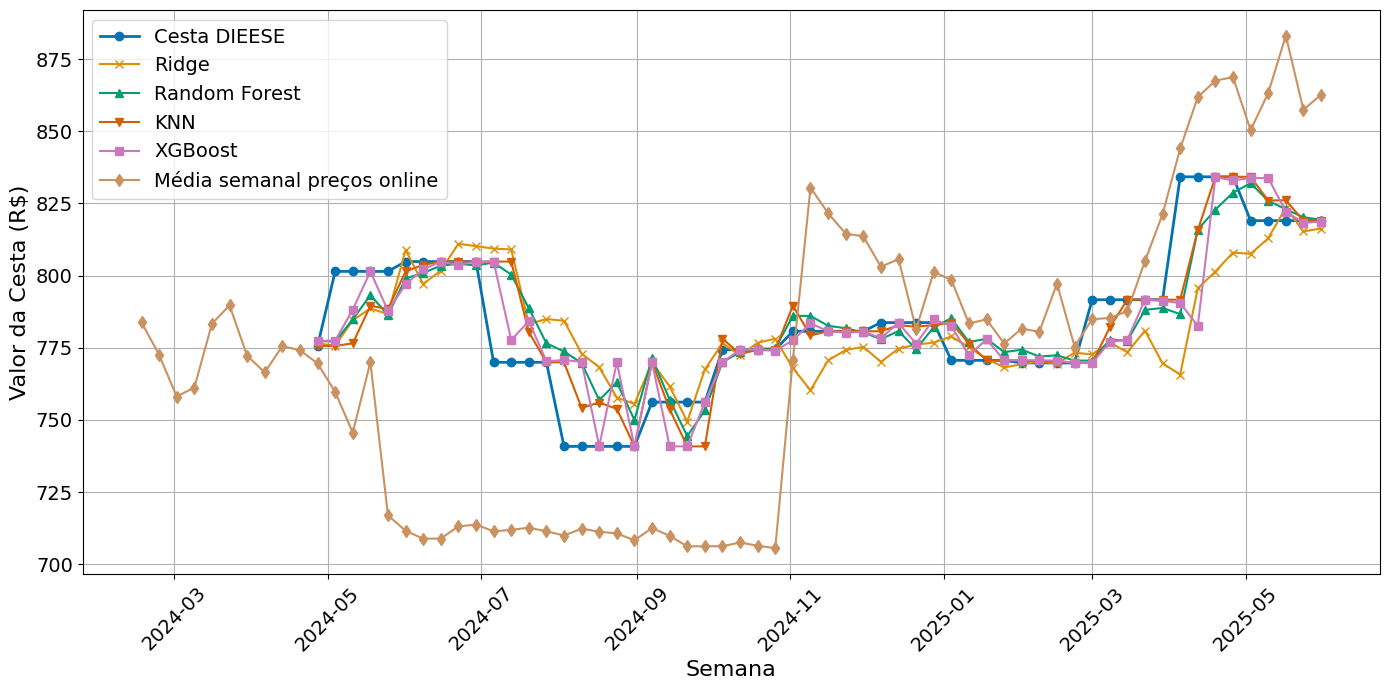

In [17]:
# Paleta daltônica
colors = sns.color_palette("colorblind")

# Criar figura
plt.figure(figsize=(14, 7))

# Plotando as séries
plt.plot(df_comparacao['semana'], df_comparacao['real'], label='Cesta DIEESE', marker='o', linewidth=2, color=colors[0])
plt.plot(df_comparacao['semana'], df_comparacao['ridge'], label='Ridge', marker='x', color=colors[1])
plt.plot(df_comparacao['semana'], df_comparacao['random_forest'], label='Random Forest', marker='^', color=colors[2])
plt.plot(df_comparacao['semana'], df_comparacao['knn'], label='KNN', marker='v', color=colors[3])
plt.plot(df_comparacao['semana'], df_comparacao['xgb'], label='XGBoost', marker='s', color=colors[4])
plt.plot(df['semana'], df['cesta_online'], label='Média semanal preços online', marker='d', color=colors[5])

# Ajustes visuais
plt.xlabel('Semana', fontsize=16)
plt.ylabel('Valor da Cesta (R$)', fontsize=16)
plt.title('')
plt.legend(fontsize=14)
plt.grid(True)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 4. Importância de permutação e previsão do algoritmo KNN

Verificando a importância de permutação do algoritmo de melhore performance. Rodando o código do modelo KNN novamente para evitar conflito com os demais modelos

In [18]:
# Grade expandida de hiperparâmetros
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Gerar combinações de hiperparâmetros
combinacoes = list(itertools.product(
    param_grid['n_neighbors'],
    param_grid['weights'],
    param_grid['p']
))

# Armazenar resultados
resultados_parametros = {}

for n_neighbors, weights, p in combinacoes:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base apenas no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo KNN com múltiplos hiperparâmetros
        model_knn = KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p
        )
        model_knn.fit(X_train_scaled, y_train)
        y_pred = model_knn.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_neighbors, weights, p)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Escolher o melhor conjunto de hiperparâmetros com base no RMSE
melhor_param = min(resultados_parametros, key=lambda x: resultados_parametros[x]['rmse'])

# Exibir resultados
print(f"Melhor combinação (n_neighbors, weights, p): {melhor_param}")
print(f"Melhor RMSE: {resultados_parametros[melhor_param]['rmse']}")
print(f"Melhor MAE: {resultados_parametros[melhor_param]['mae']}")
print(f"Melhor MAPE: {resultados_parametros[melhor_param]['mape']:.2f}%")

Melhor combinação (n_neighbors, weights, p): (2, 'distance', 1)
Melhor RMSE: 12.882294717815418
Melhor MAE: 7.629823262742975
Melhor MAPE: 0.97%


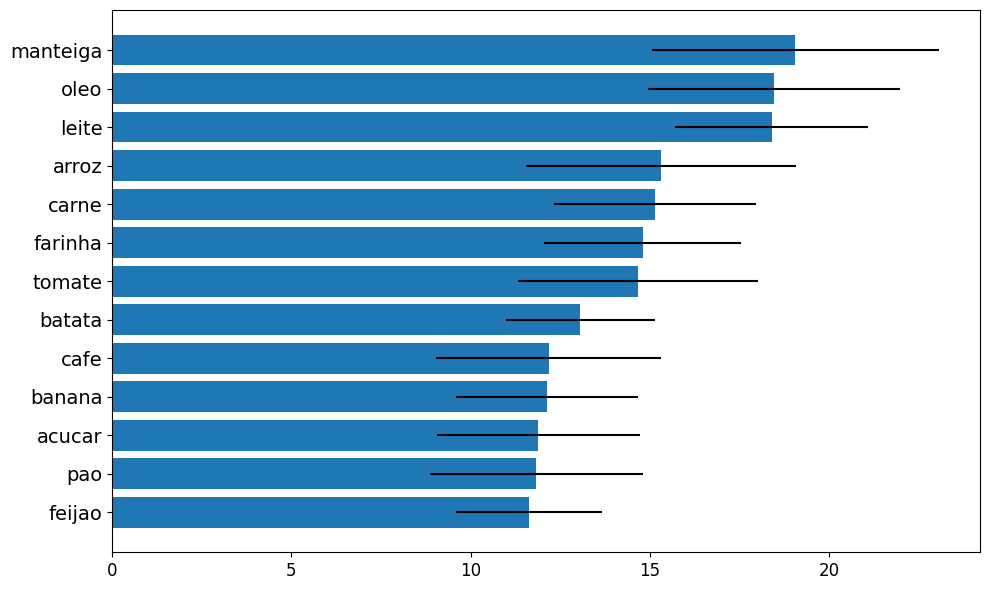

In [19]:
# Reescalar os dados com o scaler final
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Recriar o melhor modelo KNN com os melhores hiperparâmetros encontrados
model_final = KNeighborsRegressor(
    n_neighbors=melhor_param[0],
    weights=melhor_param[1],
    p=melhor_param[2]
)
model_final.fit(X_scaled_final, y)

# Calcular a importância por permutação usando RMSE (negativo)
resultado_perm = permutation_importance(
    model_final, X_scaled_final, y,
    n_repeats=30,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Processar os resultados
importancias = resultado_perm.importances_mean
erros = resultado_perm.importances_std
nomes_variaveis = X.columns

# Ordenar para o gráfico
indices = np.argsort(importancias)

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(range(len(importancias)), importancias[indices], xerr=erros[indices], align='center')

# Eixo Y com nomes das variáveis
plt.yticks(range(len(importancias)), nomes_variaveis[indices], fontsize=14)

# Aumentar ticks do eixo X
plt.xticks(fontsize=12)

plt.xlabel("", fontsize=14)   # legenda eixo X
plt.title("", fontsize=14)    # título (se quiser maior também)
plt.tight_layout()

# Exibir o gráfico
plt.show()

Comparação Previsão do modelo KNN e o observaso pelo DIEESE

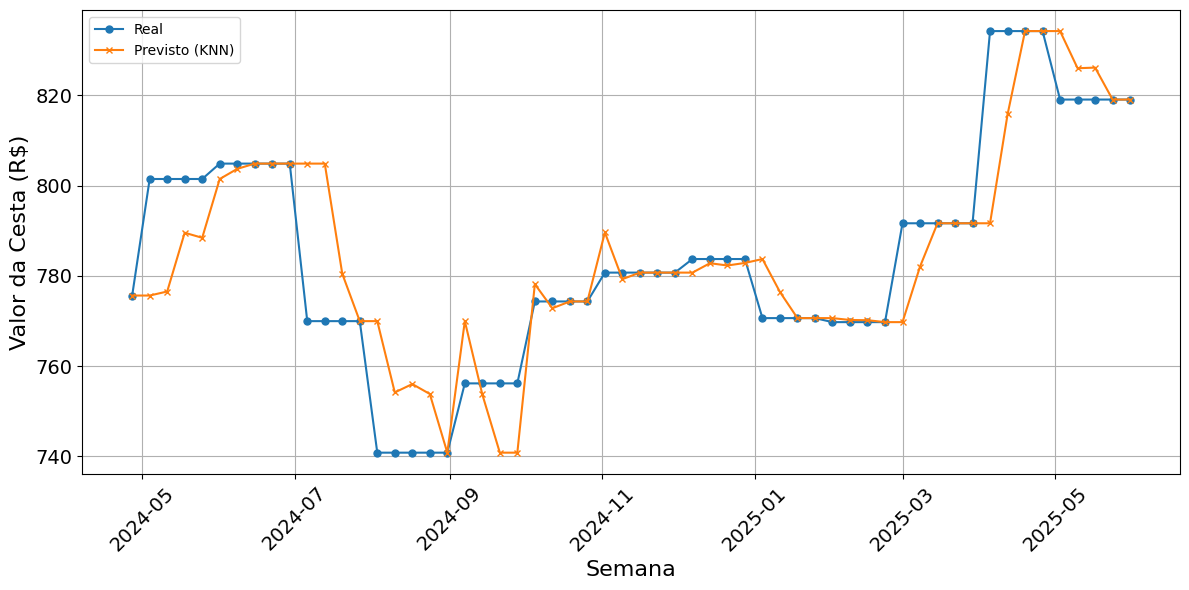

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df_resultado_knn['semana'], df_resultado_knn['real'], label='Real', marker='o', markersize=5)
plt.plot(df_resultado_knn['semana'], df_resultado_knn['knn'], label='Previsto (KNN)', marker='x', markersize=5)
plt.xlabel('Semana', fontsize=16)
plt.ylabel('Valor da Cesta (R$)', fontsize=16)
plt.title('')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)   
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 5. Análise SHAP dos modelos XGB e RandomForest

#### 5.1 Análise SHAP do modelo XGBoost

In [21]:
# Dados
X = df.drop(columns=['semana', 'cesta_dieese', 'cesta_online'])
y = df['cesta_dieese']

In [22]:
# Rodando novamente o código do modelo XGBoost para evitar conflitos

# Parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [3, 5, 7],                 
    'learning_rate': [0.01, 0.05, 0.1],     
    'subsample': [0.8, 1.0],                
    'colsample_bytree': [0.8, 1.0]          
}

# Gerar combinações de parâmetros (limitado aqui a 3 para não gerar grade muito grande)
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['learning_rate']
))

# Armazenar resultados
resultados_parametros = {}

for n_est, max_d, lr in param_combinations:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Modelo XGBoost
        model_xgb = XGBRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            learning_rate=lr,
            objective='reg:squarederror',
            verbosity=0,
            random_state=42
        )
        model_xgb.fit(X_train_scaled, y_train)
        y_pred = model_xgb.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_est, max_d, lr)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

In [23]:
# Encontrar o melhor conjunto de parâmetros com base no RMSE
melhor_params = min(resultados_parametros, key=lambda k: resultados_parametros[k]['rmse'])
print("Melhor conjunto encontrado:", melhor_params)
print("Métricas:", resultados_parametros[melhor_params])

Melhor conjunto encontrado: (200, 5, 0.05)
Métricas: {'rmse': np.float64(14.376139924976735), 'mae': 8.35538624730604, 'mape': 1.063953080786474, 'y_real': [np.float64(775.63), np.float64(801.45), np.float64(801.45), np.float64(801.45), np.float64(801.45), np.float64(804.86), np.float64(804.86), np.float64(804.86), np.float64(804.86), np.float64(804.86), np.float64(769.96), np.float64(769.96), np.float64(769.96), np.float64(769.96), np.float64(740.82), np.float64(740.82), np.float64(740.82), np.float64(740.82), np.float64(740.82), np.float64(756.17), np.float64(756.17), np.float64(756.17), np.float64(756.17), np.float64(774.32), np.float64(774.32), np.float64(774.32), np.float64(774.32), np.float64(780.71), np.float64(780.71), np.float64(780.71), np.float64(780.71), np.float64(780.71), np.float64(783.72), np.float64(783.72), np.float64(783.72), np.float64(783.72), np.float64(770.63), np.float64(770.63), np.float64(770.63), np.float64(770.63), np.float64(769.74), np.float64(769.74), np.

PermutationExplainer explainer: 69it [00:16,  4.16it/s]                        


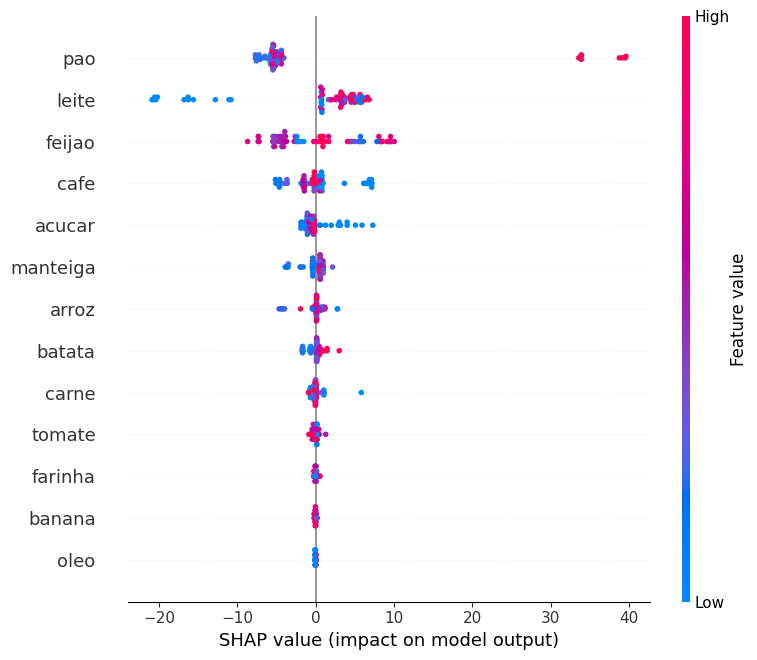

In [24]:
# Escalonar
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Treinar novamente o melhor modelo
model_final = XGBRegressor(
    n_estimators=melhor_params[0],
    max_depth=melhor_params[1],
    learning_rate=melhor_params[2],
    objective='reg:squarederror',
    verbosity=0,
    random_state=42
)
model_final.fit(X_scaled_final, y)

# Explicador SHAP sem TreeExplainer
masker = shap.maskers.Independent(X_scaled_final)
explainer = shap.Explainer(model_final.predict, masker)

# Calcular valores SHAP
shap_values = explainer(X_scaled_final)

# Gera o gráfico (sem mostrar)
shap.summary_plot(shap_values, features=X, feature_names=X.columns, show=False)

<Axes: xlabel='mean(|SHAP value|)'>

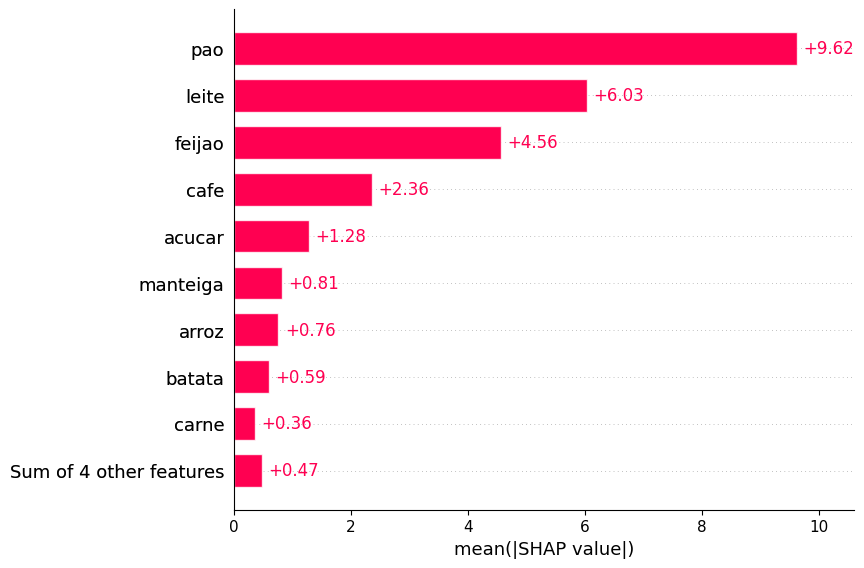

In [25]:
# Escalonar
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Treinar novamente o melhor modelo
model_final = XGBRegressor(
    n_estimators=melhor_params[0],
    max_depth=melhor_params[1],
    learning_rate=melhor_params[2],
    objective='reg:squarederror',
    verbosity=0,
    random_state=42
)
model_final.fit(X_scaled_final, y)

# Explicador SHAP sem TreeExplainer
masker = shap.maskers.Independent(X_scaled_final)
explainer = shap.Explainer(model_final.predict, masker, feature_names=X.columns)

# Calcular valores SHAP
shap_values = explainer(X_scaled_final)

# Gerar gráfico de barras com nomes dos atributos
shap.plots.bar(shap_values, show=False)

#### 5.2 Análise SHAP do modelo RandomForest

In [26]:
# Dados
X = df.drop(columns=['semana', 'cesta_dieese', 'cesta_online'])
y = df['cesta_dieese']

In [31]:
# Parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
param_combinations = list(product(param_grid['n_estimators'], param_grid['max_depth']))

# Armazenar resultados
resultados_parametros = {}

for n_est, max_d in param_combinations:
    y_real_total = []
    y_pred_total = []

    for i in range(10, len(X)):  # Começa de i=10 para estabilidade
        X_train = X.iloc[:i]
        y_train = y.iloc[:i]
        X_test = X.iloc[i:i+1]
        y_test = y.iloc[i:i+1]

        # Escalonar com base apenas no treino
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Treinar modelo Random Forest
        model_rf = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            random_state=42
        )
        model_rf.fit(X_train_scaled, y_train)
        y_pred = model_rf.predict(X_test_scaled)

        y_real_total.append(y_test.values[0])
        y_pred_total.append(y_pred[0])

    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_real_total, y_pred_total))
    mae = mean_absolute_error(y_real_total, y_pred_total)
    mape = mean_absolute_percentage_error(y_real_total, y_pred_total) * 100  # %

    resultados_parametros[(n_est, max_d)] = {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'y_real': y_real_total,
        'y_pred': y_pred_total
    }

# Melhor combinação
melhor_params = min(resultados_parametros, key=lambda p: resultados_parametros[p]['rmse'])
melhor_resultado = resultados_parametros[melhor_params]

print(f"Melhor combinação: n_estimators={melhor_params[0]}, max_depth={melhor_params[1]}")
print(f"   → RMSE: {melhor_resultado['rmse']:.4f}")
print(f"   → MAE:  {melhor_resultado['mae']:.4f}")
print(f"   → MAPE: {melhor_resultado['mape']:.2f}%")

Melhor combinação: n_estimators=200, max_depth=5
   → RMSE: 13.9366
   → MAE:  9.5474
   → MAPE: 1.22%


PermutationExplainer explainer: 69it [00:46,  1.18it/s]                        


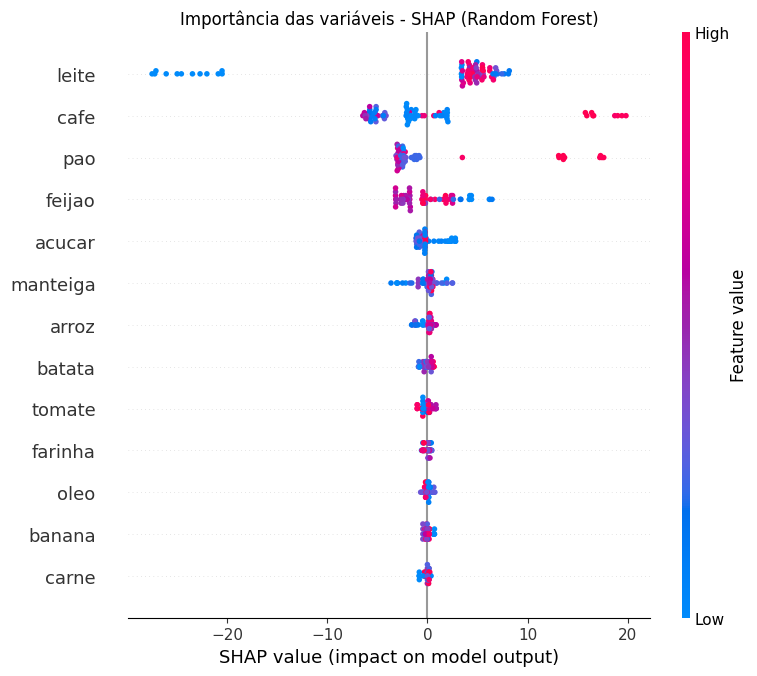

In [32]:
# Escalonar todos os dados
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Treinar novamente o melhor modelo encontrado
model_final = RandomForestRegressor(
    n_estimators=melhor_params[0],
    max_depth=melhor_params[1],
    random_state=42
)
model_final.fit(X_scaled_final, y)

# Criar o explicador SHAP (sem TreeExplainer)
masker = shap.maskers.Independent(X_scaled_final)
explainer = shap.Explainer(model_final.predict, masker)

# Calcular valores SHAP
shap_values = explainer(X_scaled_final)

# Gera o gráfico SHAP com nomes das features
shap.summary_plot(
    shap_values,
    features=X,                # DataFrame original
    feature_names=X.columns,   # Nomes das colunas
    show=False
)
plt.title("Importância das variáveis - SHAP (Random Forest)")
plt.show()

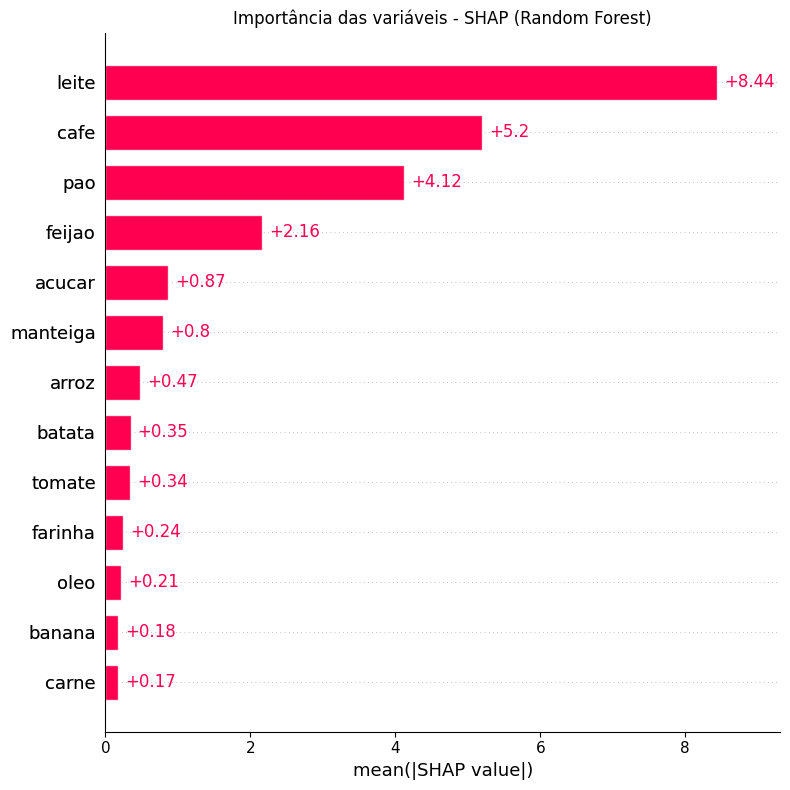

In [35]:
# Escalonar os dados
scaler_final = MinMaxScaler()
X_scaled_final = scaler_final.fit_transform(X)

# Treinar novamente o melhor modelo Random Forest
model_final = RandomForestRegressor(
    n_estimators=melhor_params[0],
    max_depth=melhor_params[1],
    random_state=42
)
model_final.fit(X_scaled_final, y)

# Criar o explicador SHAP para modelos de árvore (RandomForest)
explainer = shap.Explainer(
    model_final, 
    X_scaled_final, 
    feature_names=X.columns  # garante que os nomes das variáveis apareçam
)

# Calcular valores SHAP
shap_values = explainer(X_scaled_final)

# Gerar gráfico de barras com nomes das variáveis
shap.plots.bar(
    shap_values,
    max_display=len(X.columns),  # mostra todas as variáveis
    show=False
)

plt.title("Importância das variáveis - SHAP (Random Forest)")
plt.tight_layout()
plt.show()